Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)

# Display the first few rows of the dataframe
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


#1. statistical analysis

In [4]:
columns_to_analyze = ['MathScore', 'ReadingScore', 'WritingScore']

In [5]:
# converting non numeric columns to numeric data
for col in columns_to_analyze:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# getting mean for some columns
means = df[columns_to_analyze].mean()
means

MathScore       66.558402
ReadingScore    69.377533
WritingScore    68.418622
dtype: float64

#2. Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [8]:
#checking for missing values
print(df.isnull().sum())

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [9]:
#droping columns of less importance
DF=df.drop(["TransportMeans", "IsFirstChild", "NrSiblings"],   axis=1)
DF.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,5 - 10,76,78,75


In [10]:
#replacing missing values with mode
ColumnName = ["EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus", "PracticeSport", "WklyStudyHours"]

for col in ColumnName:
    DF[col].fillna(DF[col].mode()[0], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_9464\1912198563.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF[col].fillna(DF[col].mode()[0], inplace=True)


In [11]:
print(DF.isnull().sum())

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


COUNT AND FREQUENCY DISTRIBUTION FOR CATEGORICAL ATTRIBUTES

In [12]:
# Identify categorical columns
categorical_columns = ["Gender", "EthnicGroup", "ParentEduc","LunchType","ParentMaritalStatus","PracticeSport","WklyStudyHours"]

# Loop through categorical columns and display count & frequency
for col in categorical_columns:
    print(f"Distribution for {col}:")
    print(DF[col].value_counts())
    print("\nFrequency for {col}:")
    print(DF[col].value_counts(normalize=True))
    print("-" * 30)


Distribution for Gender:
Gender
female    15424
male      15217
Name: count, dtype: int64

Frequency for {col}:
Gender
female    0.503378
male      0.496622
Name: proportion, dtype: float64
------------------------------
Distribution for EthnicGroup:
EthnicGroup
group C    11052
group D     7503
group B     5826
group E     4041
group A     2219
Name: count, dtype: int64

Frequency for {col}:
EthnicGroup
group C    0.360693
group D    0.244868
group B    0.190137
group E    0.131882
group A    0.072419
Name: proportion, dtype: float64
------------------------------
Distribution for ParentEduc:
ParentEduc
some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

Frequency for {col}:
ParentEduc
some college          0.276688
high school           0.185601
associate's degree    0.181130
some high school      0.180053
bachelor's degree     0.110506
master's deg

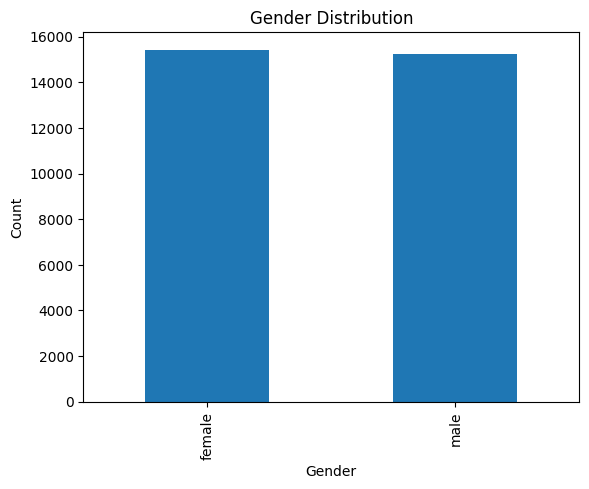

In [13]:
# Bar plot for Gender
DF["Gender"].value_counts().plot(kind="bar", title="Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


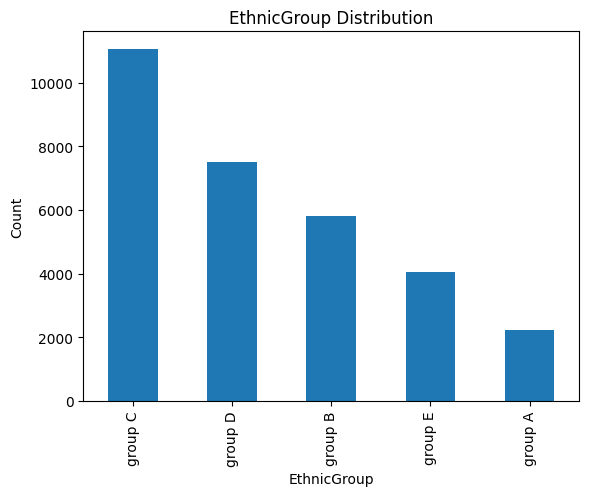

In [14]:
# Bar plot for EthnicGroup
DF["EthnicGroup"].value_counts().plot(kind="bar", title="EthnicGroup Distribution")
plt.xlabel("EthnicGroup")
plt.ylabel("Count")
plt.show()


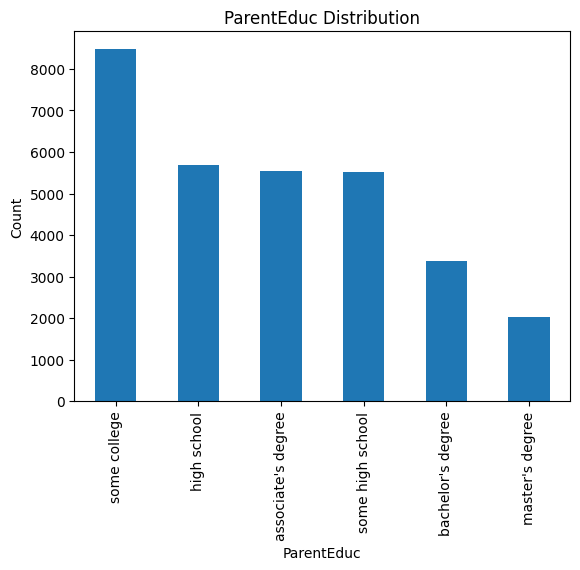

In [15]:
# Bar plot for ParentEduc
DF["ParentEduc"].value_counts().plot(kind="bar", title="ParentEduc Distribution")
plt.xlabel("ParentEduc")
plt.ylabel("Count")
plt.show()


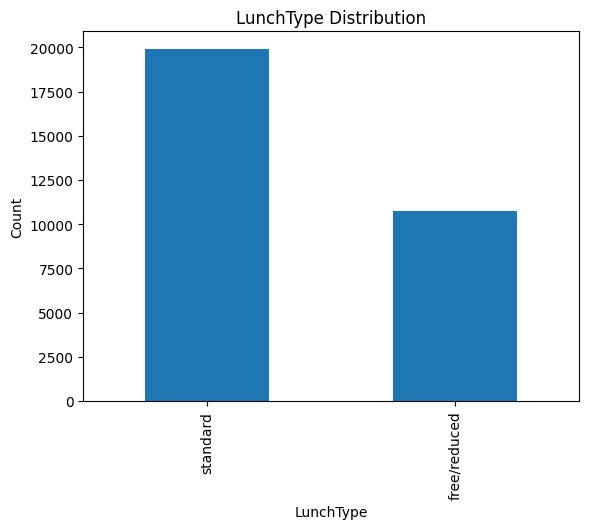

In [16]:
# Bar plot for LunchType
DF["LunchType"].value_counts().plot(kind="bar", title="LunchType Distribution")
plt.xlabel("LunchType")
plt.ylabel("Count")
plt.show()


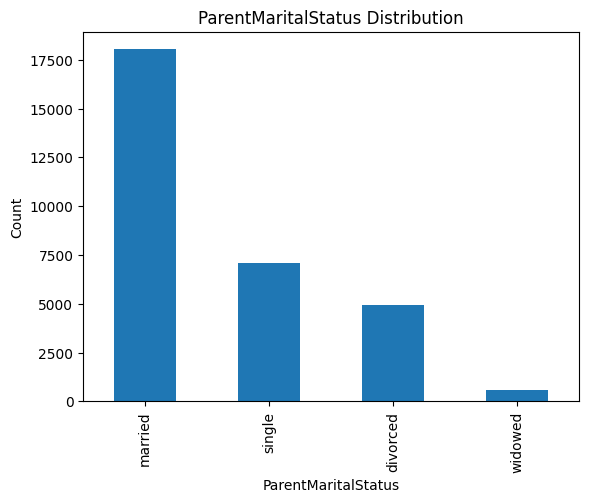

In [17]:
# Bar plot for ParentMaritalStatus
DF["ParentMaritalStatus"].value_counts().plot(kind="bar", title="ParentMaritalStatus Distribution")
plt.xlabel("ParentMaritalStatus")
plt.ylabel("Count")
plt.show()

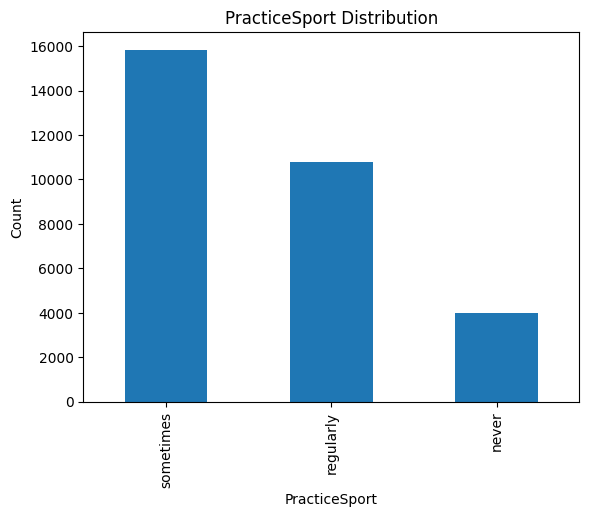

In [18]:
# Bar plot for PracticeSport
DF["PracticeSport"].value_counts().plot(kind="bar", title="PracticeSport Distribution")
plt.xlabel("PracticeSport")
plt.ylabel("Count")
plt.show()

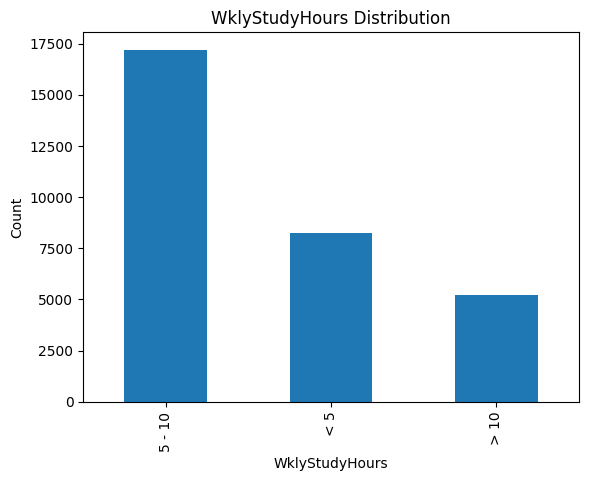

In [19]:
# Bar plot for WklyStudyHours
DF["WklyStudyHours"].value_counts().plot(kind="bar", title="WklyStudyHours Distribution")
plt.xlabel("WklyStudyHours")
plt.ylabel("Count")
plt.show()

COMPARING GENDER AND TEST RESULTS

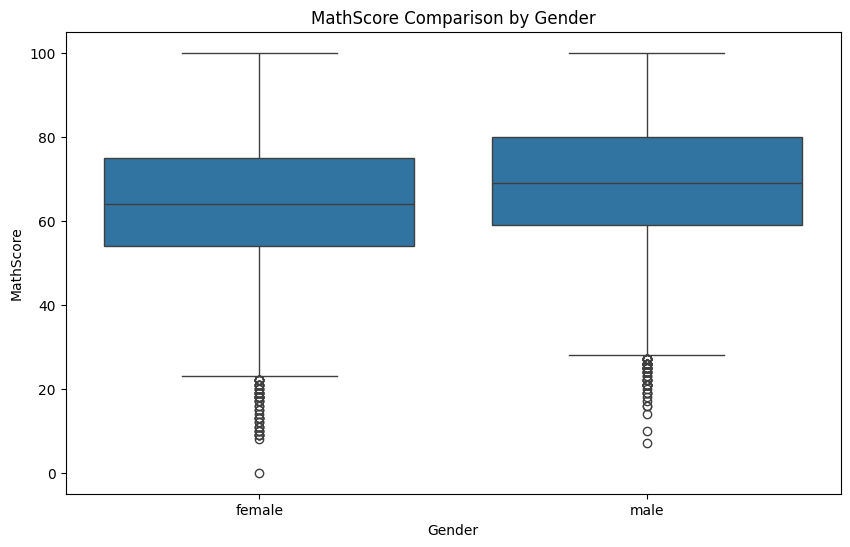

In [20]:
# Group by Gender
gender_scores = DF.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore']].mean()

# Visualizing the comparison using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='MathScore', data=DF)
plt.title('MathScore Comparison by Gender')
plt.show()

# Repeat for ReadingScore and WritingScore


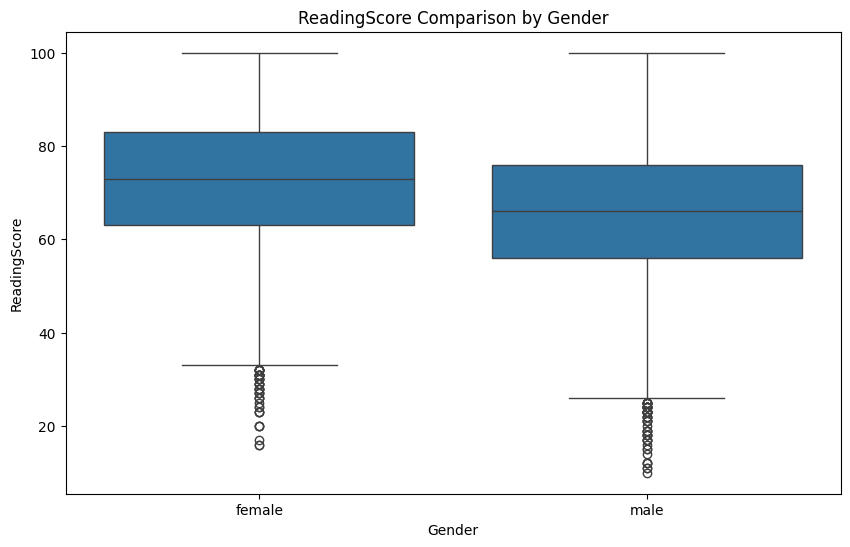

In [21]:
# Visualizing the comparison using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='ReadingScore', data=DF)
plt.title('ReadingScore Comparison by Gender')
plt.show()


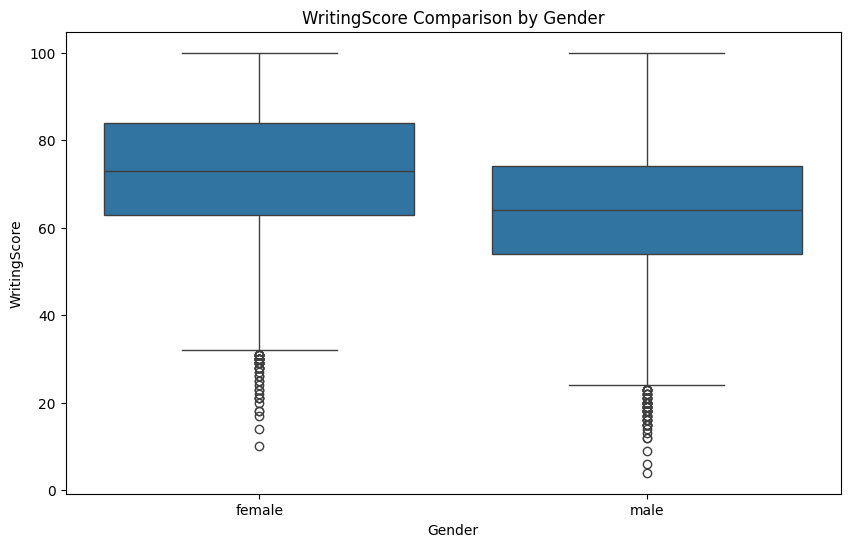

In [22]:
# Visualizing the comparison using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='WritingScore', data=DF)
plt.title('WritingScore Comparison by Gender')
plt.show()

#getting more insight for gender vs mathscore

In [23]:
# Grouping by Gender and calculating statistics
summary_stats = DF.groupby('Gender')['MathScore'].describe()
print(summary_stats)

          count       mean        std  min   25%   50%   75%    max
Gender                                                             
female  15424.0  64.080654  15.238172  0.0  54.0  64.0  75.0  100.0
male    15217.0  69.069856  15.076223  7.0  59.0  69.0  80.0  100.0


In [24]:
# Define male_scores
male_scores = DF[DF['Gender'] == 'male']['MathScore']
mean_male= 69.069856

# Define female_scores
female_scores = DF[DF['Gender'] == 'female']['MathScore']
mean_female= 64.080654


In [25]:
#resampling to enable performance of t-test
min_size = min(len(male_scores), len(female_scores))
sample_male = male_scores.sample(min_size, random_state=42)
sample_female = female_scores.sample(min_size, random_state=42)


In [26]:
# Performing the t-test
t_stat, p_value = ttest_ind(male_scores, female_scores, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 28.807257515424794, P-value: 4.400611656859241e-180


C:\Users\USER\AppData\Local\Temp\ipykernel_9464\1726037730.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_scores, label='Male', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9464\1726037730.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_scores, label='Female', shade=True)


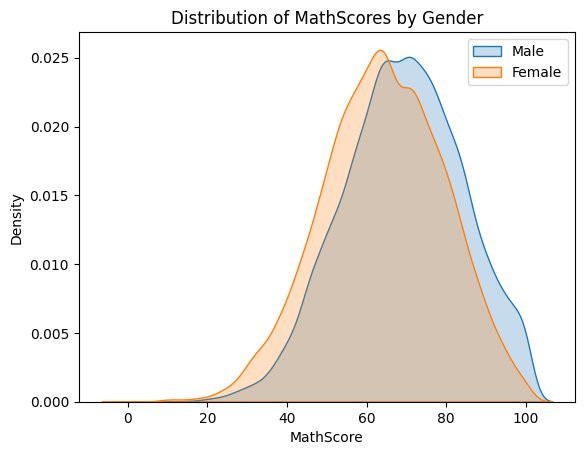

In [27]:
#visualizing diistribution by histogram
sns.kdeplot(male_scores, label='Male', shade=True)
sns.kdeplot(female_scores, label='Female', shade=True)
plt.title('Distribution of MathScores by Gender')
plt.legend()
plt.show()

the p-value shows significant diff in mathscores with respect to gender
to better understand the magnitude of diff:

In [28]:
#checking effect size using Cohen's d
mean_diff = mean_male - mean_female
pooled_std = np.sqrt(((male_scores.std()**2) + (female_scores.std()**2)) / 2)
cohen_d = mean_diff / pooled_std
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.3291591858481025


COMPARING PARENTEDU AND TEST RESULTS

In [29]:
#Using ANOVA to compare test results as against parentedu
# Math Score
groups_math = [DF[DF['ParentEduc'] == level]['MathScore'] for level in DF['ParentEduc'].unique()]
anova_math = f_oneway(*groups_math)
print(f'Math Score ANOVA: F-statistic = {anova_math.statistic}, p-value = {anova_math.pvalue}')

# Writing Score
groups_writing = [DF[DF['ParentEduc'] == level]['WritingScore'] for level in DF['ParentEduc'].unique()]
anova_writing = f_oneway(*groups_writing)
print(f'Writing Score ANOVA: F-statistic = {anova_writing.statistic}, p-value = {anova_writing.pvalue}')

# Reading Score
groups_reading = [DF[DF['ParentEduc'] == level]['ReadingScore'] for level in DF['ParentEduc'].unique()]
anova_reading = f_oneway(*groups_reading)
print(f'Reading Score ANOVA: F-statistic = {anova_reading.statistic}, p-value = {anova_reading.pvalue}')


Math Score ANOVA: F-statistic = 219.665787210337, p-value = 4.3746378254295243e-231
Writing Score ANOVA: F-statistic = 360.719095284088, p-value = 0.0
Reading Score ANOVA: F-statistic = 244.9920791738841, p-value = 1.6450927207676856e-257


In [30]:
#Encoding categorical data for modeling
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Ensures a dense output

# Fit and transform the data
encoded_data = encoder.fit_transform(DF[['ParentEduc']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(['ParentEduc']),
    index=df.index  # Align the index with the original DataFrame
)

# Combine with the original DataFrame
df_encoded = pd.concat([DF, encoded_df], axis=1)

print(df_encoded)

     Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0    female     group C   bachelor's degree      standard       none   
1    female     group C        some college      standard       none   
2    female     group B     master's degree      standard       none   
3      male     group A  associate's degree  free/reduced       none   
4      male     group C        some college      standard       none   
..      ...         ...                 ...           ...        ...   
816  female     group D         high school      standard       none   
890    male     group E         high school      standard       none   
911  female     group C         high school  free/reduced  completed   
934  female     group D  associate's degree      standard  completed   
960    male     group B        some college      standard       none   

    ParentMaritalStatus PracticeSport WklyStudyHours  MathScore  ReadingScore  \
0               married     regularly            < 5  

In [31]:
# Prepare independent and dependent variables
X = df_encoded.drop(columns=['ParentEduc', 'MathScore', 'ReadingScore', 'WritingScore'])
y = df_encoded[['MathScore', 'ReadingScore', 'WritingScore']]

In [32]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Creating Baseline model prediction
# Calculate mean for each target in the training set-baseline pred
baseline_predictions = y_train.mean(axis=0)

# Repeat the baseline predictions for the test set size
y_baseline = np.tile(baseline_predictions, (y_test.shape[0], 1))

# Evaluate Baseline
baseline_mse = mean_squared_error(y_test, y_baseline, multioutput='raw_values')
baseline_r2 = r2_score(y_test, y_baseline, multioutput='raw_values')

print("Baseline MSE (Math, Writing, Reading):", baseline_mse)
print("Baseline R-squared (Math, Writing, Reading):", baseline_r2)


Baseline MSE (Math, Writing, Reading): [232.1717496  215.21045929 236.31344169]
Baseline R-squared (Math, Writing, Reading): [-0.00061129 -0.00027292 -0.00051334]


In [ ]:
# Train multi-output regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Trained Model
model_mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
model_r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Model MSE (Math, Writing, Reading):", model_mse)
print("Model R-squared (Math, Writing, Reading):", model_r2)

In [ ]:
print(X_train.dtypes)